# DataCamp Certification Case Study

### Project Brief

A food website has hired you as a data scientist. The website features new recipes on the homepage every day. They want to feature recipes that will be popular with visitors to the site. However, it is difficult to guess in advance which recipes will be popular or not.

They have collected data from previously published recipes. The owner wants to know whether you can use this information to predict whether a recipe will be popular (or in other words, receive a high score). She is especially interested in preventing unpopular (low-scoring) recipes from appearing on the homepage. She estimates that of all unpopular recipes, they currently correctly categorize 75% of them as being unpopular. She wants to know how your solution would compare to this guessing approach.

You will need to present your findings to the owner, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/recipes.csv"`

In [67]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150 # increase the clarity of plots

df = pd.read_csv("data/recipes.csv") # import the dataset into a dataframe to work with

## Explore Data Set

In [68]:
df.head(10) # taking a look at the table columns and structure

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0
5,328806,My Kids Breakfast Smoothie,Smoothies,313.4,42.7,42.1,17.0,11.7,2.0,1.0
6,375975,Moroccan Meatballs in Tomato Sauce,Lamb/Sheep,566.0,103.7,10.1,5.0,25.6,4.0,0.0
7,189787,Eggplant (Aubergine) and Tomato Crisp,Vegetable,151.5,5.5,15.1,6.4,5.1,8.0,1.0
8,424798,Very Berry Iced Tea,Beverages,4.0,0.0,0.9,0.3,0.1,8.0,1.0
9,17549,Burnished Bananas,Dessert,120.9,0.0,29.8,17.3,1.3,1.0,0.0


In [69]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RecipeId,43092.0,NaN,NaN,NaN,224707.928154,141980.91435,38.0,102616.75,212333.0,336736.25,540876.0
Name,43092,41240,Chicken Cacciatore,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecipeCategory,43052,246,Dessert,4211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calories,43092.0,NaN,NaN,NaN,353.297587,405.065683,0.0,164.8,284.1,446.725,30933.4
CholesterolContent,43092.0,NaN,NaN,NaN,69.475757,112.422309,0.0,4.5,40.7,95.9,9167.2
CarbohydrateContent,43092.0,NaN,NaN,NaN,32.844187,46.428258,0.0,11.6,25.4,43.4,3564.4
SugarContent,43092.0,NaN,NaN,NaN,12.2066,28.304371,0.0,2.2,5.5,14.1,2566.8
ProteinContent,43092.0,NaN,NaN,NaN,15.773125,21.588594,0.0,3.4,8.8,24.3,1420.8
RecipeServings,43092.0,NaN,NaN,NaN,9.517521,224.022873,1.0,4.0,6.0,8.0,32767.0
HighScore,43092.0,NaN,NaN,NaN,0.645735,0.478296,0.0,0.0,1.0,1.0,1.0


RecipeCategory: There are many recipe categories, would like to group them if possible but cannot have too many categories.
Calories: Definitely some clear outliers, will need to vizualize the data and possibly remove some outliers, also will need to remove 0 calories which makes no sense for a recipe dataset.
CholesterolContent: also showing some high outlier values, will need to visualize to see.
CarbohydrateContent: also showing some high outlier values, will need to visualize to see.
SugarContent: also showing some high outlier values, will need to visualize to see. Not as high though.
ProteinContent: also showing some high outlier values, will need to visualize to see. Not as high though.
RecipeServings: Very high outliers, will need to take a look and probably remove outliers as they must be typo's
HighScore: will need to check for balanced labels. Based on the mean seems imbalanced towards the 'Popular' items. May use over or undersampling techniques.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43092 entries, 0 to 43091
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecipeId             43092 non-null  int64  
 1   Name                 43092 non-null  object 
 2   RecipeCategory       43052 non-null  object 
 3   Calories             43092 non-null  float64
 4   CholesterolContent   43092 non-null  float64
 5   CarbohydrateContent  43092 non-null  float64
 6   SugarContent         43092 non-null  float64
 7   ProteinContent       43092 non-null  float64
 8   RecipeServings       43092 non-null  float64
 9   HighScore            43092 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.3+ MB


No obvious Null values except for RecipeCategories. Will need to check for other possible null's such as calories == 0

### Categorical Variables

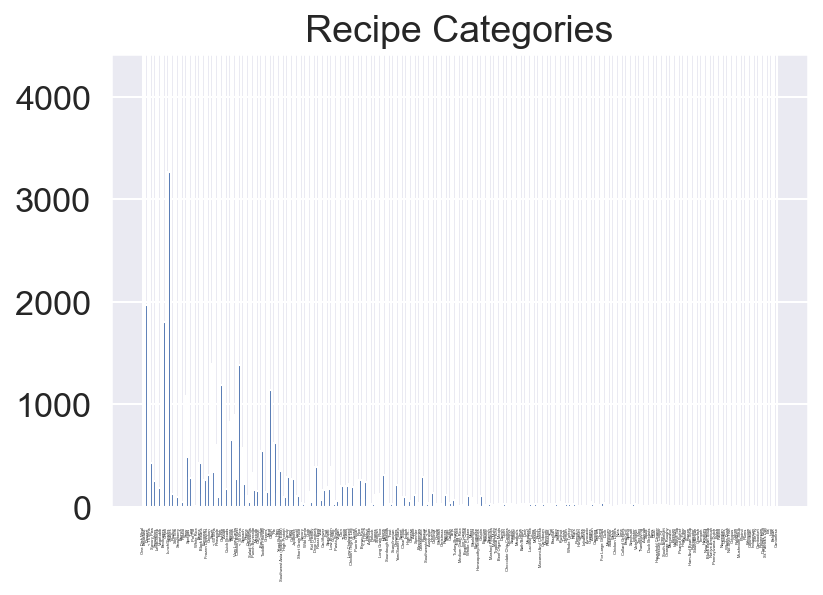

In [71]:
df['RecipeCategory'].hist(bins=df['RecipeCategory'].nunique()) #Vizualize the distribution of categories
plt.title("Recipe Categories")
plt.xticks(rotation=90,fontsize=2) 
plt.show()

Way to many categories will need to bin many of them into an 'Other' category since we will need to OneHotEncode this categorical variable.

In [72]:
df['RecipeCategory'].isna().sum() # count the nulls in this distribution

40

In [73]:
df['RecipeCategory'].fillna(value="Other",inplace=True) # Replace Null values with 'Other'

In [74]:
df['RecipeCategory'].isna().sum() # double check for nulls

0

In [75]:
# check percentage of each category compared to the whole.
Category_perc = df['RecipeCategory'].value_counts()/len(df) 
Category_perc = Category_perc * 100
Category_perc.head(20)

Dessert           9.772115
Lunch/Snacks      7.590736
One Dish Meal     6.718184
Vegetable         5.794579
Breakfast         4.569294
Beverages         4.184071
Chicken           3.230298
Chicken Breast    3.209412
Pork              2.749930
Meat              2.645503
Potato            2.510907
Breads            2.081593
Quick Breads      1.921470
Cheese            1.714935
Sauces            1.506080
Pie               1.441103
< 60 Mins         1.390049
< 30 Mins         1.325072
Bar Cookie        1.267057
Stew              1.116216
Name: RecipeCategory, dtype: float64

In [76]:
# variable to select indeces of variables with less than 1% to group.
group_other = list(Category_perc.index[Category_perc < 1])

In [77]:
# will replace those with less than 1% of total with 'Other'
df['RecipeCategory'] = df['RecipeCategory'].replace(to_replace=group_other,value="Other")
df['RecipeCategory'].value_counts()

Other             14333
Dessert            4211
Lunch/Snacks       3271
One Dish Meal      2895
Vegetable          2497
Breakfast          1969
Beverages          1803
Chicken            1392
Chicken Breast     1383
Pork               1185
Meat               1140
Potato             1082
Breads              897
Quick Breads        828
Cheese              739
Sauces              649
Pie                 621
< 60 Mins           599
< 30 Mins           571
Bar Cookie          546
Stew                481
Name: RecipeCategory, dtype: int64

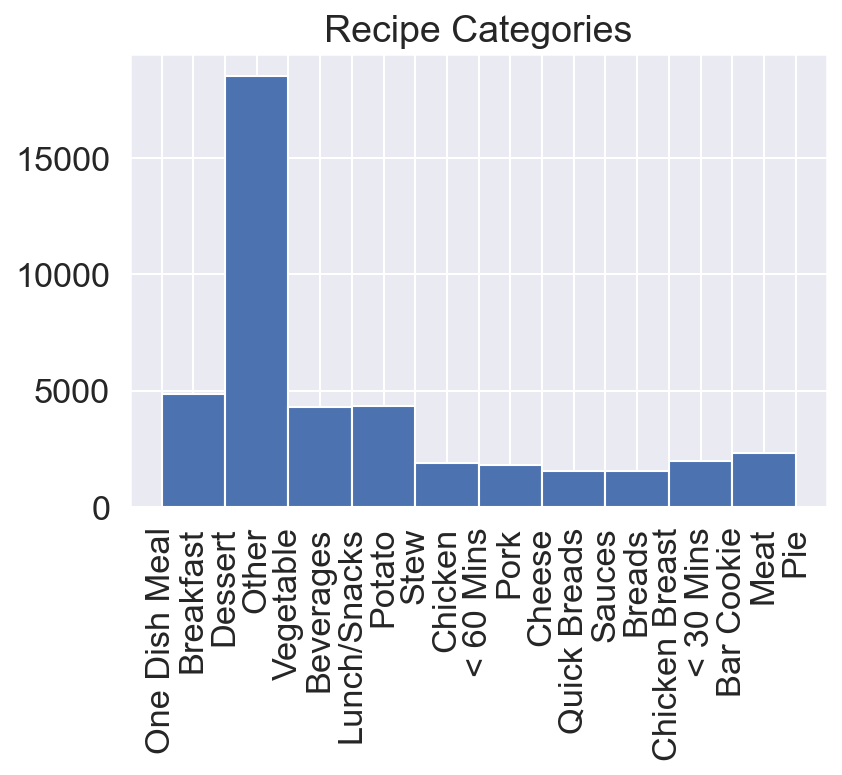

In [78]:
df['RecipeCategory'].hist()
plt.title("Recipe Categories")
plt.xticks(rotation=90)
plt.show()

Re-Grouped the Recipe category from 246 to 21 groups, much more usable for a model.

### Numerical Data

In [79]:
# Select numerical data for correlation analysis
num_data = df[['Calories','CholesterolContent','CarbohydrateContent','SugarContent','ProteinContent','RecipeServings']]

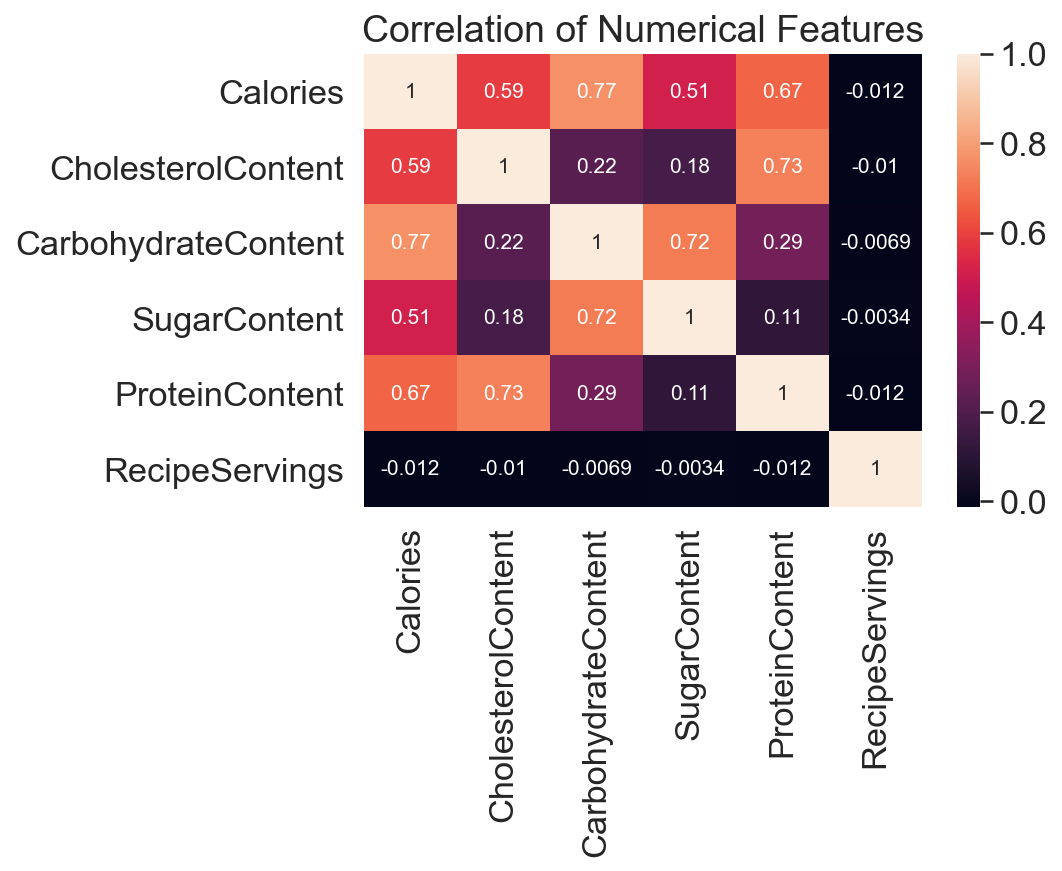

In [80]:
# Map out correllations
sns.heatmap(num_data.corr(),annot=True)
plt.title("Correlation of Numerical Features")
plt.show()

Some variable are more positively correlated with highest being Calories to ProteinContent at 0.77 which isn't cause for removal of any columns.

#### Calories

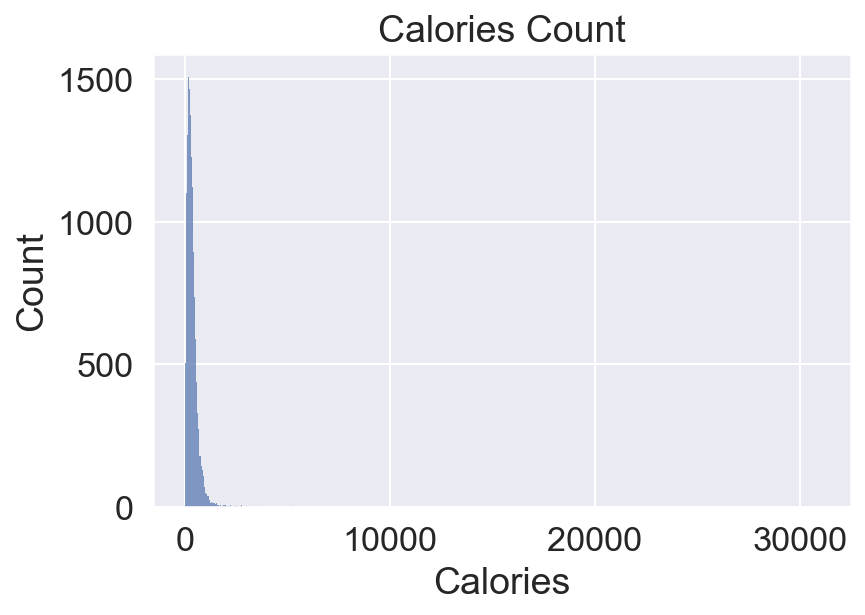

In [81]:
# Vilualize Calories data
sns.histplot(x='Calories',data=df)
plt.title("Calories Count")
plt.show()

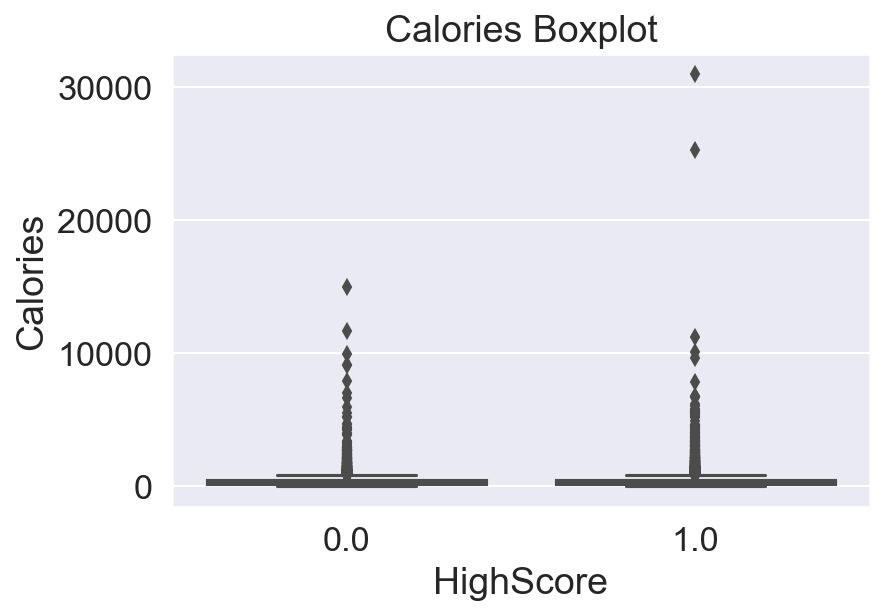

In [82]:
sns.boxplot(x='HighScore',y='Calories',data=df)
plt.title("Calories Boxplot")
plt.show()

The calories dataset is clearly showing some outliers we will need to remove some as they are way outside the mean of the dataset and will add unnecessary noise.

In [83]:
no_calories = df[df['Calories']==0] # look for 0 calories which wouldnt make sense
no_calories['Calories'].count() # showing a small amount compared to the entire dataset could be removed.

188

In [84]:
df.drop(labels=no_calories.index,axis=0,inplace=True) # remove 0 calories

In [85]:
df[df['Calories']==0].count()

RecipeId               0
Name                   0
RecipeCategory         0
Calories               0
CholesterolContent     0
CarbohydrateContent    0
SugarContent           0
ProteinContent         0
RecipeServings         0
HighScore              0
dtype: int64

In [86]:
# remove calorie outliers from the dataset
mean_cals = df['Calories'].mean()
std_cals = df['Calories'].std()
df = df[(df['Calories'] < mean_cals + 3*std_cals) & (df['Calories'] > mean_cals - 3*std_cals)]

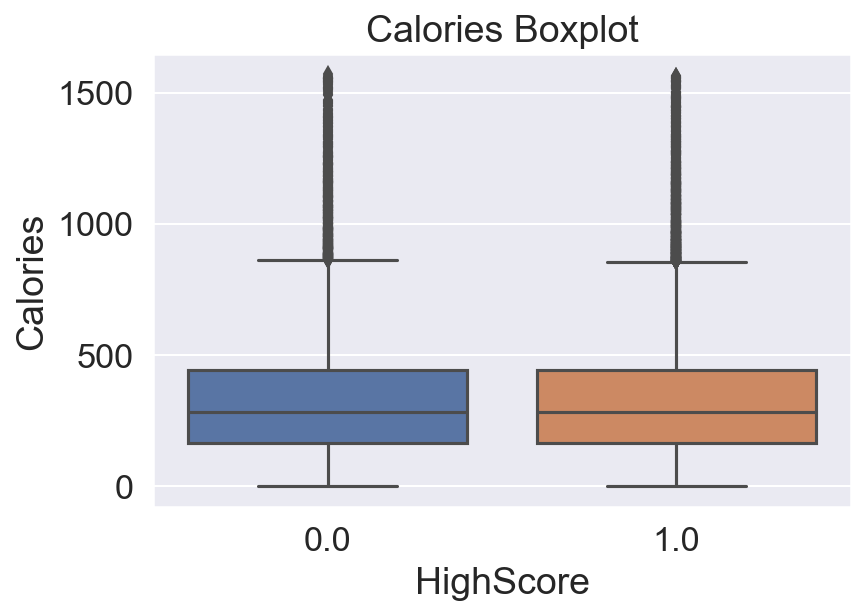

In [87]:
sns.boxplot(x='HighScore',y='Calories',data=df)
plt.title("Calories Boxplot")
plt.show()

### CholesterolContent

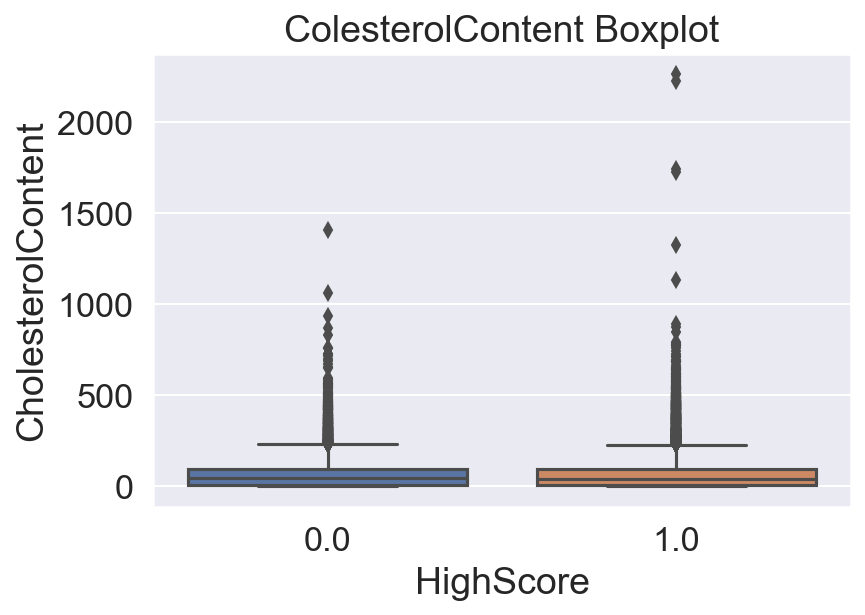

In [88]:
# Visualize the ColesterolContent data
sns.boxplot(x='HighScore',y='CholesterolContent',data=df)
plt.title("ColesterolContent Boxplot")
plt.show()

In [89]:
df.sort_values(by='CholesterolContent',ascending=False).head(10) # high values but not as bad as calories, scaling should help with this variable

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
35837,339605,Liver and Onions,Other,1541.8,2261.0,86.0,3.4,170.4,2.0,1.0
30249,268528,Kittencal's Beef Liver and Onions,Other,1444.2,2222.9,80.4,7.0,169.2,4.0,1.0
11052,7195,Oven Style Scotch Eggs,< 60 Mins,987.5,1739.8,25.9,6.3,69.4,8.0,1.0
32838,42870,Luby's Cafeteria Beef Liver and Onions,Other,1157.2,1727.8,66.6,4.5,133.1,6.0,1.0
9322,7440,Sur Le Gril Chopped Calf Liver Pate,Other,728.9,1405.4,15.2,1.6,81.8,4.0,0.0
33465,169714,Curried Eggs,Other,839.6,1326.1,29.4,6.3,48.5,1.0,1.0
33678,521002,Luby's Liver and Onions,Other,730.4,1130.5,22.6,3.2,82.4,4.0,1.0
34076,274154,Tomato Basil Omelet (Low Carb),Breakfast,1016.2,1059.7,3.6,2.8,26.5,1.0,0.0
8655,8131,Acadian Peppered Shrimp,Other,1346.2,934.1,17.4,1.1,95.1,4.0,0.0
26361,20946,Smoked Salmon on Creamy Egg Filled Popovers,Breakfast,862.1,893.5,56.6,1.7,42.2,3.0,1.0


In [90]:
#mean_col = df['CholesterolContent'].mean()
#std_col = df['CholesterolContent'].std()
#df = df[(df['CholesterolContent'] < mean_col + 3*std_col) & (df['CholesterolContent'] > mean_col - 3*std_col)]

In [91]:
#sns.boxplot(x='HighScore',y='CholesterolContent',data=df)
#plt.show()

In [92]:
#df.shape

### CarbohydrateContent

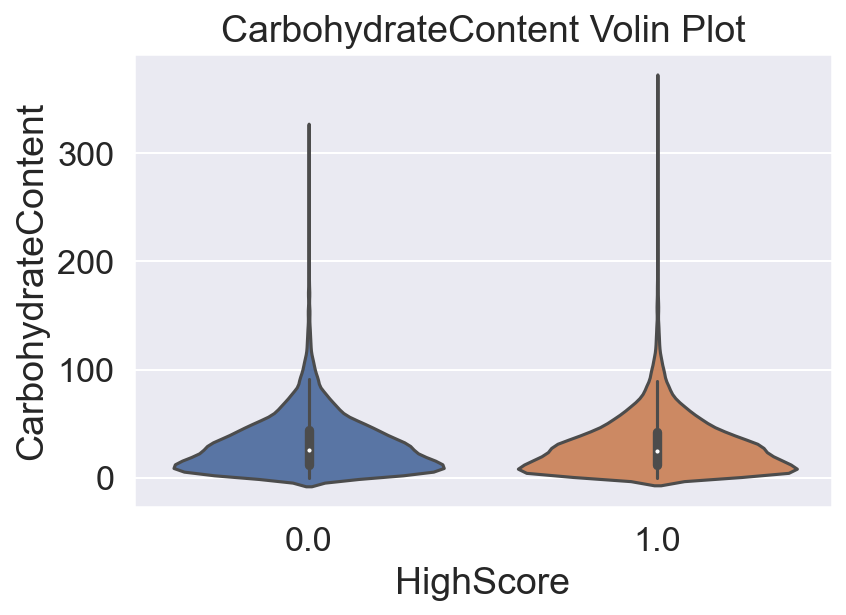

In [93]:
 # high values but not as bad as calories, scaling should help with this variable
sns.violinplot(x='HighScore',y='CarbohydrateContent',data=df)
plt.title("CarbohydrateContent Volin Plot")
plt.show()

In [94]:
#mean_carb = df['CarbohydrateContent'].mean()
#std_carb = df['CarbohydrateContent'].std()
#df = df[(df['CarbohydrateContent'] < mean_carb + 3*std_carb) & (df['CarbohydrateContent'] > mean_carb - 3*std_carb)]

In [95]:
#sns.violinplot(x='HighScore',y='CarbohydrateContent',data=df)
#plt.show()

### SugarContent

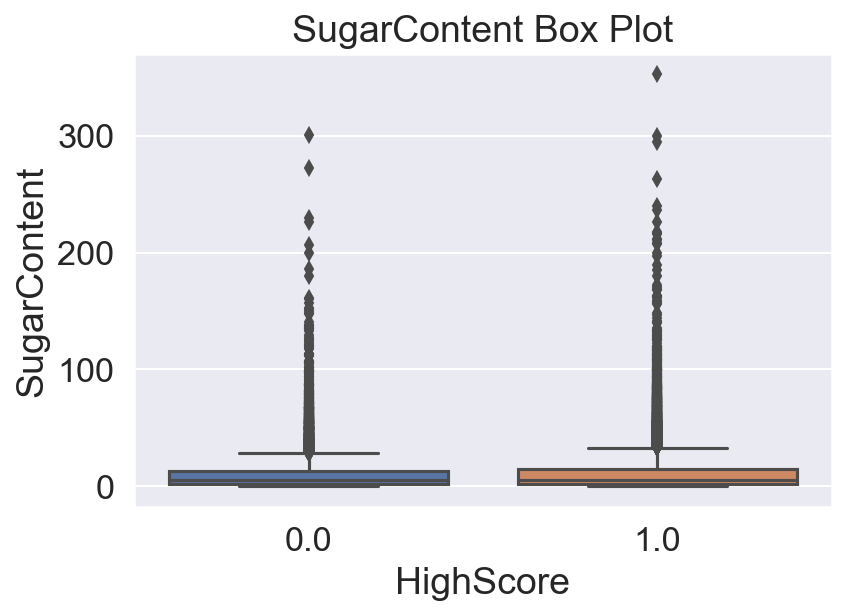

In [96]:
sns.boxplot(x='HighScore',y='SugarContent',data=df)
plt.title("SugarContent Box Plot")
plt.show()

In [97]:
# high values but not as bad as calories, scaling should help with this variable
df.sort_values(by='SugarContent',ascending=False).head(10)

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
18985,117485,Tomato Raspberry Jam,Other,1446.3,0.0,365.5,352.5,9.4,3.0,1.0
20329,102077,Pumpkin Pie Latte,Beverages,1465.1,73.8,319.1,300.8,10.3,1.0,0.0
34867,83474,Coconut Candy,Other,1161.0,0.0,299.9,299.7,0.0,1.0,1.0
8318,255233,Linda's Cream Cheese Frosting,Dessert,1485.7,95.7,302.3,294.4,6.9,1.0,1.0
24162,337446,Elisebeth's Homemade Spicy Apple Orange Party ...,Other,1216.4,0.0,308.5,272.4,2.4,6.0,0.0
16428,309671,Pork Tenderloin Marinade/Basting Sauce,Pork,1337.0,0.0,337.1,263.1,8.0,1.0,1.0
13635,147145,Hot Chocolate Float,Beverages,1449.2,33.0,276.5,240.2,72.8,4.0,1.0
29583,403422,"Sarasota's 7 Spicy, Sweet &amp; Tangy Grilling...",Other,1089.0,0.0,280.7,236.1,2.3,8.0,1.0
8536,24765,Caramel Icing,Dessert,1374.6,141.8,234.7,229.5,1.4,1.0,0.0
18564,490458,Pomegranate Syrup or Molasses,Other,928.1,0.0,231.8,226.2,1.6,1.0,1.0


In [98]:
#mean_sug = df['SugarContent'].mean()
#std_sug = df['SugarContent'].std()
#df = df[(df['SugarContent'] < mean_sug + 3*std_sug) & (df['CarbohydrateContent'] > mean_sug - 3*std_sug)]

In [99]:
#sns.boxplot(x='HighScore',y='SugarContent',data=df)
#plt.show()

### ProteinContent

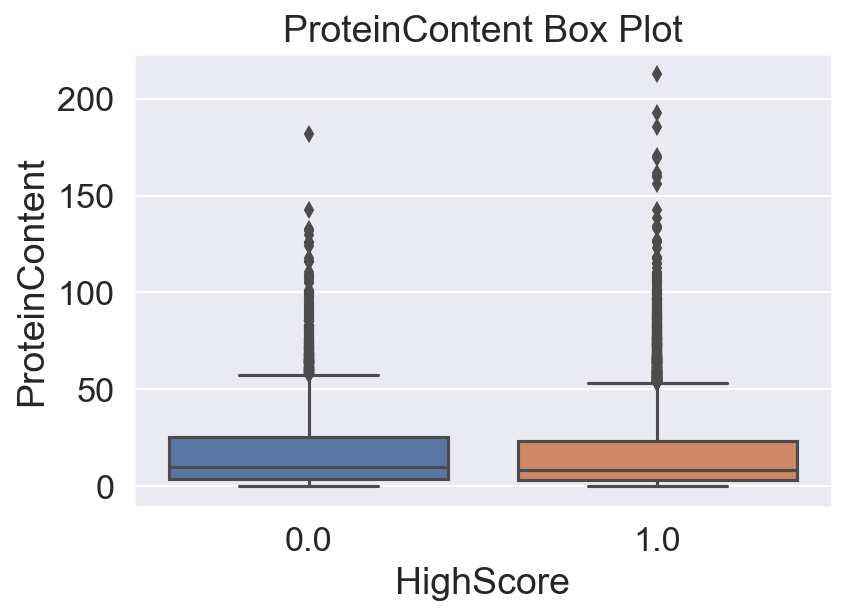

In [100]:
sns.boxplot(x='HighScore',y='ProteinContent',data=df)
plt.title("ProteinContent Box Plot")
plt.show()

In [101]:
# high values but not as bad as calories, scaling should help with this variable
df.sort_values(by='ProteinContent',ascending=False).head(10)

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
15875,181537,Taco Chicken Rolls,Chicken Breast,1044.6,535.6,2.0,1.0,212.5,6.0,1.0
30542,36643,Sage Turkey Cutlets (Salbeischnitzel),One Dish Meal,1116.3,505.0,8.8,4.4,192.8,4.0,1.0
6919,10967,Tequila Lime BBQ Turkey,Other,1519.1,617.4,2.1,0.4,185.6,6.0,1.0
34187,20706,Maple Teriyaki Salmon Fillets,Other,1140.3,472.9,21.3,18.4,181.9,4.0,0.0
35837,339605,Liver and Onions,Other,1541.8,2261.0,86.0,3.4,170.4,2.0,1.0
30249,268528,Kittencal's Beef Liver and Onions,Other,1444.2,2222.9,80.4,7.0,169.2,4.0,1.0
3149,68078,Curried Turkey Legs,Other,1234.5,579.4,12.8,4.2,161.5,4.0,1.0
16934,45678,Roast Turkey with Old Fashioned Bread Stuffing,Other,1475.0,541.6,32.7,3.8,160.3,6.0,1.0
12209,237476,Pan-Roasted Pork Chops,Pork,1503.5,456.6,1.8,0.7,160.0,4.0,1.0
17691,358433,Renaissance Festival Turkey Legs,Other,1191.6,579.4,2.7,2.0,159.4,4.0,1.0


In [102]:
#mean_pt = df['ProteinContent'].mean()
#std_pt = df['ProteinContent'].std()
#df = df[(df['ProteinContent'] < mean_pt + 3*std_pt) & (df['ProteinContent'] > mean_pt - 3*std_pt)]

In [103]:
#sns.boxplot(x='HighScore',y='ProteinContent',data=df)
#plt.show()

### RecipeServings

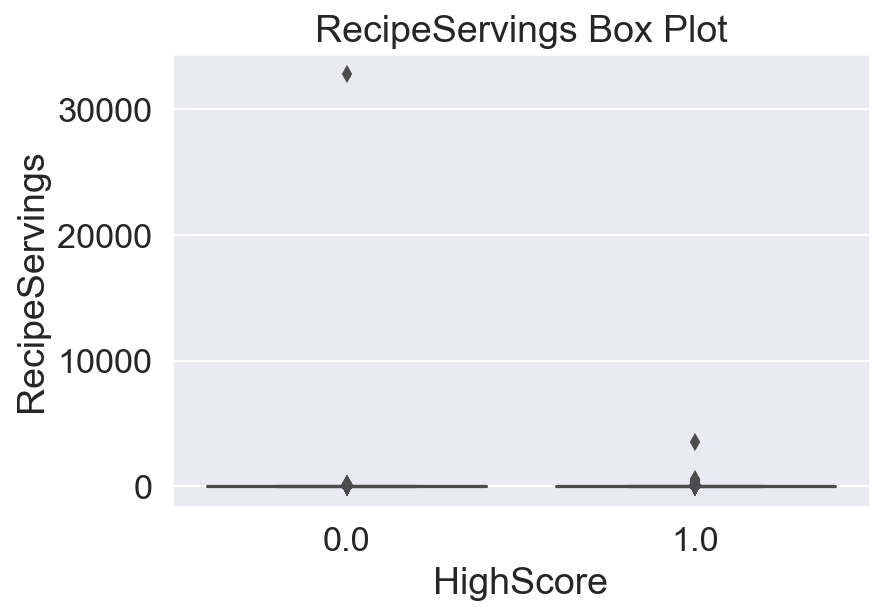

In [104]:
sns.boxplot(x='HighScore',y='RecipeServings',data=df)
plt.title("RecipeServings Box Plot")
plt.show()

In [105]:
df.sort_values(by='RecipeServings',ascending=False).head(10) # Showing a few extremely high outliers will remove those rows

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
13170,72549,Alaskan Blue Stew,Stew,127.5,5.9,27.1,3.7,5.3,32767.0,0.0
38670,19866,Elephant Stew,Meat,3.9,0.2,0.4,0.3,0.3,3500.0,1.0
5422,490620,Coffee Ice Cream and Cookie Parfaits,Other,1.4,0.2,0.2,0.2,0.0,610.0,1.0
7923,201663,Oven Fried Chicken,Chicken,2.9,1.0,0.0,0.0,0.2,410.0,1.0
23405,373997,Thum -- Garlic Sauce (Lebanon -- Middle East),Sauces,1.6,0.0,0.0,0.0,0.0,406.0,1.0
35951,203432,Candied Pretzels,Lunch/Snacks,25.6,0.7,3.9,1.9,0.5,400.0,1.0
33278,392988,Peanut Butter Cookies for a Crowd,Other,103.8,7.0,11.7,7.3,1.8,240.0,1.0
19790,136205,"Chicken, Shrimp and Sausage Jambalaya",Chicken,20.0,7.6,1.2,0.2,1.4,200.0,0.0
13685,5134,Little-Bitty Coffee-Hazelnut Biscotti,Dessert,8.0,2.4,1.2,0.6,0.2,180.0,1.0
16391,234918,German Chocolate Toffee Cookies,Other,64.2,7.9,7.2,3.0,0.9,156.0,0.0


In [106]:
df.drop(labels=[13170,38670,5422],axis=0,inplace=True) # removing the three highest outliers

In [107]:
mean_rs = df['RecipeServings'].mean()
std_rs = df['RecipeServings'].std()
df = df[(df['RecipeServings'] < mean_rs + 3*std_rs) & (df['RecipeServings'] > mean_rs - 3*std_rs)]
# still to many outliers for this type of variable, will remove the outliers over 3 standard veriations away

In [108]:
df.shape

(41923, 10)

In [109]:
df.head()

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,Other,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Other,261.6,103.6,20.9,0.2,6.7,15.0,1.0


## Setup data for Model

In [47]:
print("Unpopular :" + str(df[df['HighScore']==0]['HighScore'].count()))
print("Popular :" + str(df[df['HighScore']==1]['HighScore'].count()))

Unpopular :14879
Popular :27044


We see twice as many poplular data as unpopular, we will oversample the unpopular data until the data is balanced.

In [48]:
df0 = df[df['HighScore']==0].reset_index() # only unpopular records
df1 = df[df['HighScore']==1].reset_index() # only popular records

df0_index = np.random.choice(df0.index,replace=True,size=len(df1)) # sample from the unpopular records of size same as popular records

In [49]:
# new dataframe of only unpopular records
df_balanced = df0.iloc[df0_index,:]
df_balanced.drop(axis=1,columns=['index'],inplace=True) 
df_balanced.head() 

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
10334,292894,Chicken Noodle Goulash (Abs Diet),Chicken Breast,368.6,100.5,47.6,1.8,35.4,4.0,0.0
13259,18715,Unstuffed Cabbage,One Dish Meal,212.8,0.0,47.3,4.5,4.9,4.0,0.0
9587,135082,Mango Kheer,Dessert,545.9,36.2,105.6,87.2,10.5,4.0,0.0
7413,2630,Sprout and Snow Pea Stir-Fry,Other,72.6,0.0,11.7,6.2,4.6,4.0,0.0
12626,92186,Quick Creamy Broccoli Soup,< 60 Mins,224.5,30.5,25.9,4.4,8.8,6.0,0.0


In [50]:
# Merge the unpopular balanced df with the popular one and shuffle the dataframe
df_bal = pd.concat([df_balanced,df1],axis=0)
df_bal = df_bal.sample(frac=1).reset_index(drop=True)
df_bal.drop(axis=1,columns=['index'],inplace=True)

In [51]:
df_bal.head()

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,378792,Thai Red Curry Risotto,Other,493.2,0.0,58.6,7.8,7.4,6.0,1.0
1,198709,Kabul Party Rice,Other,488.4,0.0,65.4,16.5,7.4,4.0,0.0
2,89059,Steve's World-Best Meatloaf,Meat,443.8,112.6,41.1,25.1,26.6,6.0,1.0
3,146549,Chipotle Pinto Beans,Stew,218.1,0.0,40.0,3.3,13.0,8.0,1.0
4,205092,Macaroni and Cheese Tuna Pie,One Dish Meal,452.9,60.0,43.3,7.0,21.7,4.0,0.0


### Recipe Categories Dummy Variables

In [52]:
# get dummy or one hot encoded values for the 'RecipeCategory' column for model classification
cat_dummies = pd.get_dummies(df_bal['RecipeCategory'])
cat_dummies.head()

,< 30 Mins,< 60 Mins,Bar Cookie,Beverages,Breads,Breakfast,Cheese,Chicken,Chicken Breast,Dessert,...,Meat,One Dish Meal,Other,Pie,Pork,Potato,Quick Breads,Sauces,Stew,Vegetable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Setup Train and Test data

In [53]:
# split into X & y values predictors and labels
num_data = df_bal[['Calories','CholesterolContent','CarbohydrateContent','SugarContent','ProteinContent','RecipeServings']]
X = pd.concat([num_data,cat_dummies],axis=1)
y = df_bal['HighScore'].astype("int16")


In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True) # split the data into train and test groups

### Scale Data

Since some of the numerical columns are in different scales (ex: Colesterol;mg Carbs:grams) we will scale our data using SciKitLearns Standard Scalar feature

In [55]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

## Model Training

We will use a custom metric to determine the accuracy required by the client, name it Unpopular Accuracy which will be the percentage of total unpopular records correctly predicted as such.

We will test various models best suited for classification:
Logistic Regression
Random Forest Classifier
XG Boost Classifier
Voting Classifier of above 3 models

Note: also tried Support Vector Machine Classifier and KNN Classifier, both provided low accuracy and cause the kernel to restart so I removed them from the analysis

In [56]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
#function to create confusion matrix and provide the Unpopular Accuracy
def conf_matrix(y_test, pred_test):    
    
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    plt.figure(figsize=(4,4))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 10}, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.show()
    print("Unpopular Accuracy = {}%".format(round(con_mat[0][0]/(con_mat[0][0]+con_mat[0][1])*100,2)))

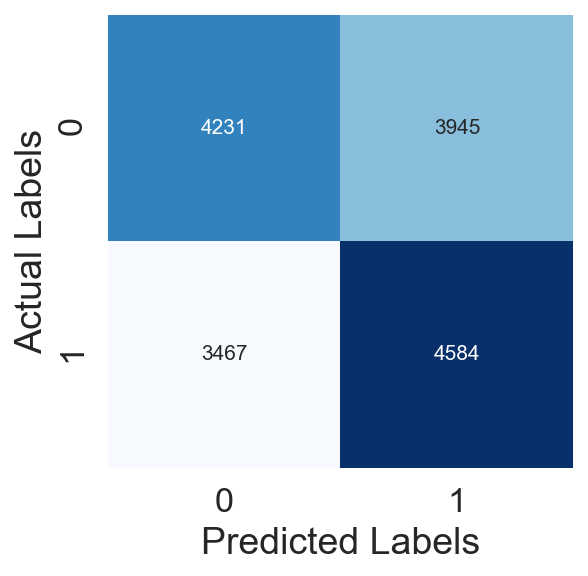

Unpopular Accuracy = 54.96%


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression()
lr.fit(X_train_s,y_train)
lr_y_pred = lr.predict(X_test_s)

conf_matrix(y_test,lr_y_pred)

Best Params: {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 20, 'max_depth': 15}


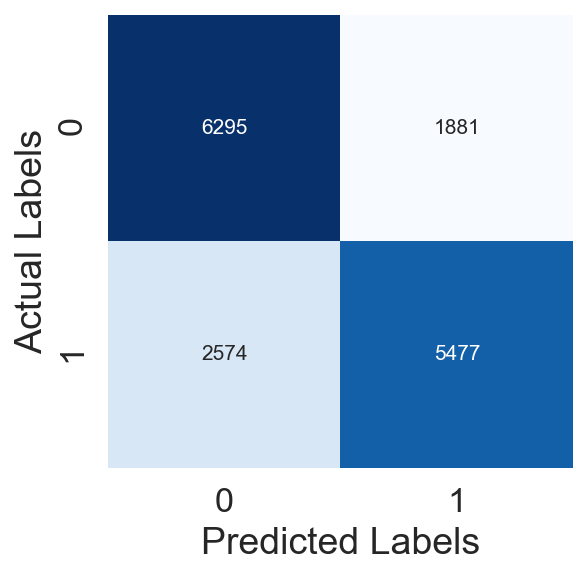

Unpopular Accuracy = 70.98%


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15],
    'max_features': [10, 20]
}

rs = RandomizedSearchCV(rf,param_grid,n_iter=10,scoring='recall')
rs.fit(X_train_s,y_train)
y_pred_rf = rs.predict(X_test_s)
print("Best Params: {}".format(rs.best_params_))
rf_best = rs.best_estimator_
conf_matrix(y_test,y_pred_rf)

{'n_estimators': 500, 'min_samples_split': 7, 'max_features': 16, 'max_depth': 18}


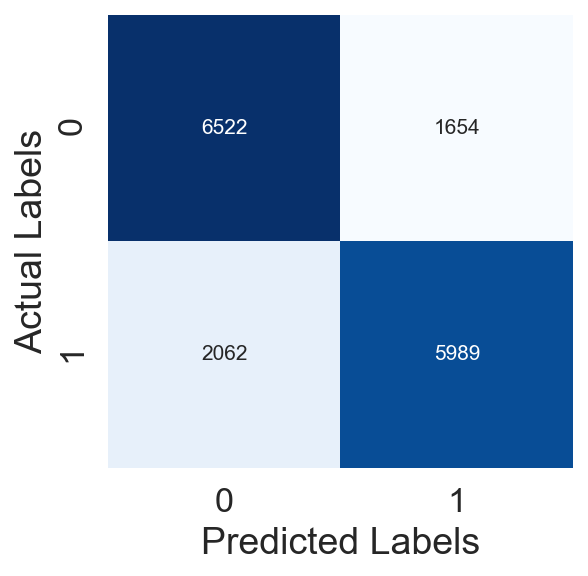

Unpopular Accuracy = 75.98%


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb2 = XGBClassifier(eval_metric='logloss',verbosity=0)

param_grid2 = {
    'min_samples_split': list(range(2,10)), 
    'n_estimators': [300,500],
    'max_depth': list(range(3,20)),
    'max_features': list(range(3,20))
}

rs2 = RandomizedSearchCV(xgb2,param_grid2,n_iter=10,scoring='recall')
rs2.fit(X_train_s,y_train)
y_pred_xgb2 = rs2.predict(X_test_s)
xgb_best = rs2.best_estimator_
print(rs2.best_params_)
conf_matrix(y_test,y_pred_xgb2)

In [60]:
# Get the feature importance of the XGB Classifier which performed the best.
df_feat = pd.DataFrame()
df_feat['Feature'] = X_train.columns
df_feat['Feature Importance'] = xgb_best.feature_importances_
df_feat.sort_values('Feature Importance', ascending=False)

,Feature,Feature Importance
10,Breads,0.052681
7,< 60 Mins,0.050678
21,Pork,0.049072
20,Pie,0.046048
8,Bar Cookie,0.043154
13,Chicken,0.042956
17,Meat,0.042522
26,Vegetable,0.041011
16,Lunch/Snacks,0.040983
22,Potato,0.039945


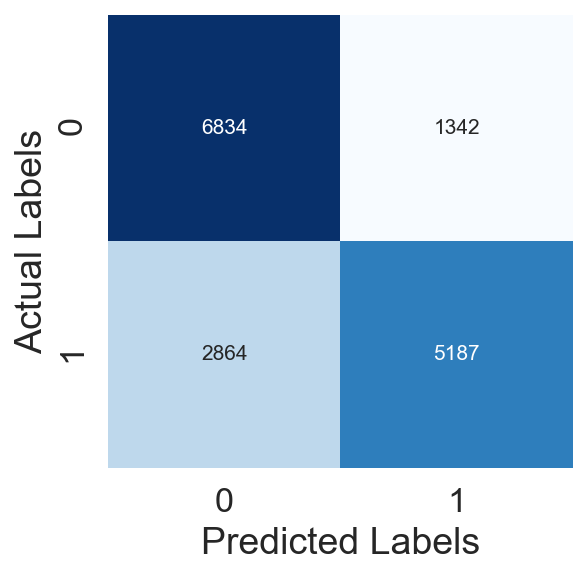

Unpopular Accuracy = 70.47%


In [61]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier( estimators=[('rf', rf_best), ('xgb', xgb_best), ('lr', lr)],voting='hard', weights=[2,3,1])
vc.fit(X_train_s,y_train)
y_pred_vc = vc.predict(X_test_s)

conf_matrix(y_test,y_pred_vc)

## Best Model Selected

The best model was the XGB Classifier which outperformed the rest with 75.98% Unpopular Accuracy on unseen data.

This is less than the accuracy of guesswork provided by the client, perhaps other models such as a Neural Network would perform better.

Feature importance analysis shows the categories of the RecipeCategory column had the most importance and so revising this column in future analyses would possibly provide a better more accurate model.